<a href="https://colab.research.google.com/github/CharanSatya31/unified_mentor/blob/main/Analyzing_Amazon_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/content/Amazon Sales data.csv")


In [ ]:
df

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,year,month,year_month,Profit Margin
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,2010-06-27,9925,255.28,159.42,2533654.00,1582243.50,951410.50,2010,5,2010-05,0.375509
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,2012-09-15,2804,205.70,117.11,576782.80,328376.44,248406.36,2012,8,2012-08,0.430676
2,Europe,Russia,Office Supplies,Offline,L,2014-05-02,341417157,2014-05-08,1779,651.21,524.96,1158502.59,933903.84,224598.75,2014,5,2014-05,0.193870
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,2014-06-20,514321792,2014-07-05,8102,9.33,6.92,75591.66,56065.84,19525.82,2014,6,2014-06,0.258307
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2013-02-01,115456712,2013-02-06,5062,651.21,524.96,3296425.02,2657347.52,639077.50,2013,2,2013-02,0.193870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Sub-Saharan Africa,Mali,Clothes,Online,M,2011-07-26,512878119,2011-09-03,888,109.28,35.84,97040.64,31825.92,65214.72,2011,7,2011-07,0.672035
96,Asia,Malaysia,Fruits,Offline,L,2011-11-11,810711038,2011-12-28,6267,9.33,6.92,58471.11,43367.64,15103.47,2011,11,2011-11,0.258307
97,Sub-Saharan Africa,Sierra Leone,Vegetables,Offline,C,2016-06-01,728815257,2016-06-29,1485,154.06,90.93,228779.10,135031.05,93748.05,2016,6,2016-06,0.409775
98,North America,Mexico,Personal Care,Offline,M,2015-07-30,559427106,2015-08-08,5767,81.73,56.67,471336.91,326815.89,144521.02,2015,7,2015-07,0.306619


In [ ]:
df.columns

Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit'],
      dtype='object')

In [ ]:
df.dtypes

Region                    object
Country                   object
Item Type                 object
Sales Channel             object
Order Priority            object
Order Date        datetime64[ns]
Order ID                   int64
Ship Date         datetime64[ns]
Units Sold                 int64
Unit Price               float64
Unit Cost                float64
Total Revenue            float64
Total Cost               float64
Total Profit             float64
year                       int32
month                      int32
year_month             period[M]
dtype: object

In [ ]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

df['year'] = df['year'].astype('int32')
df['month'] = df['month'].astype('int32')
df['year_month'] = df['year_month'].astype(str)

monthly_sales = df.groupby(['year', 'month'])[['Total Revenue', 'Total Profit']].sum().reset_index()

yearly_sales = df.groupby('year')[['Total Revenue', 'Total Profit']].sum().reset_index()

yearly_monthly_sales = df.groupby(['year', 'month'])[['Total Revenue', 'Total Profit']].sum().reset_index()



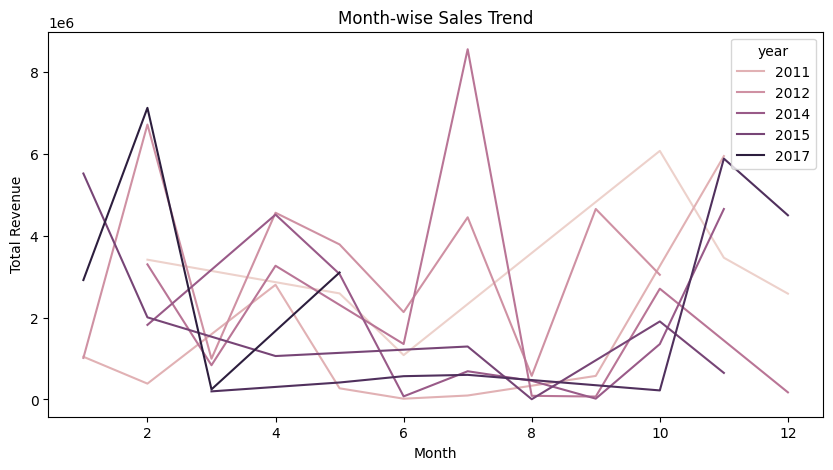

In [ ]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_sales, x='month', y='Total Revenue', hue='year')
plt.title('Month-wise Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.show()

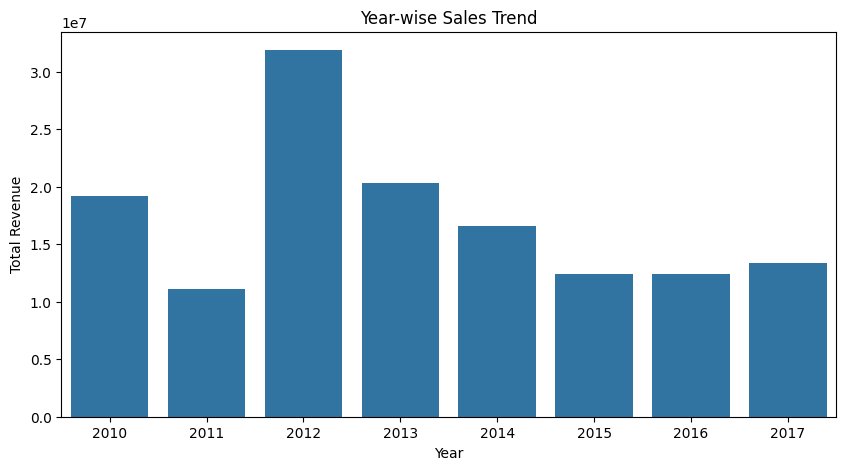

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(data=yearly_sales, x='year', y='Total Revenue')
plt.title('Year-wise Sales Trend')
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.show()

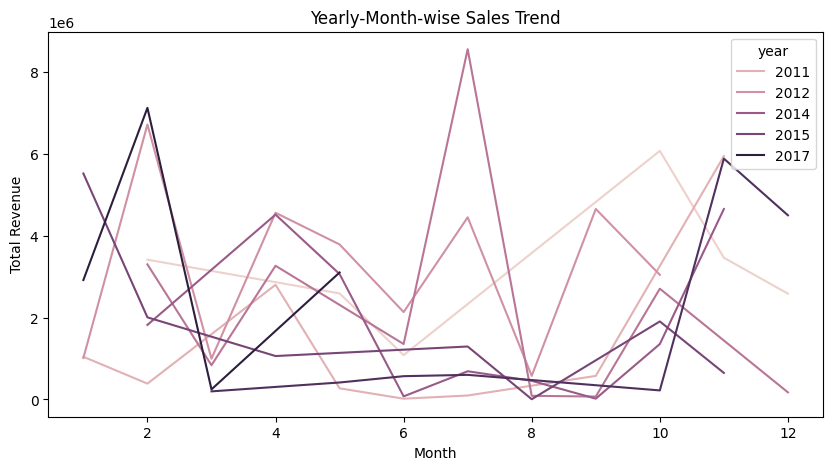

In [ ]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=yearly_monthly_sales, x='month', y='Total Revenue', hue='year')
plt.title('Yearly-Month-wise Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.show()

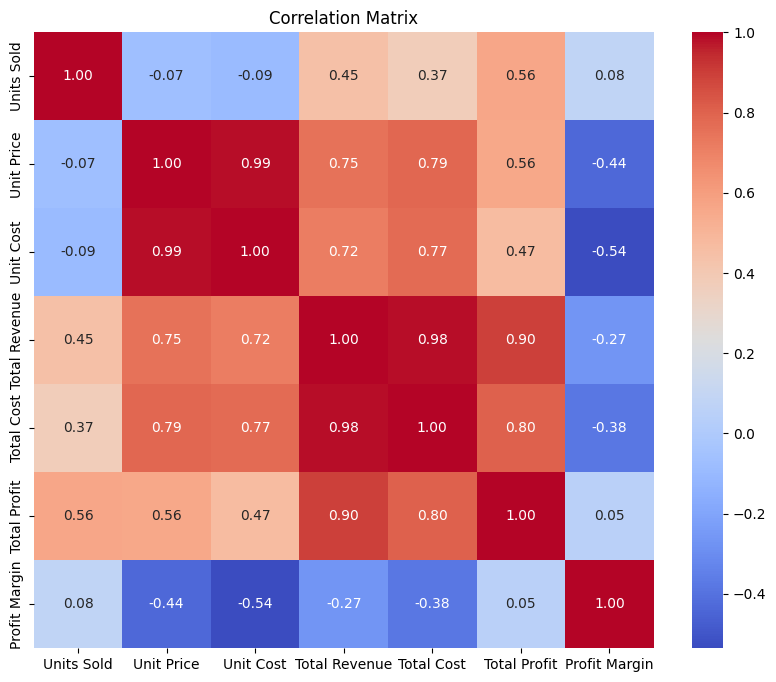

In [ ]:
df['Profit Margin'] = df['Total Profit'] / df['Total Revenue']

correlation_matrix = df[['Units Sold', 'Unit Price', 'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit', 'Profit Margin']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

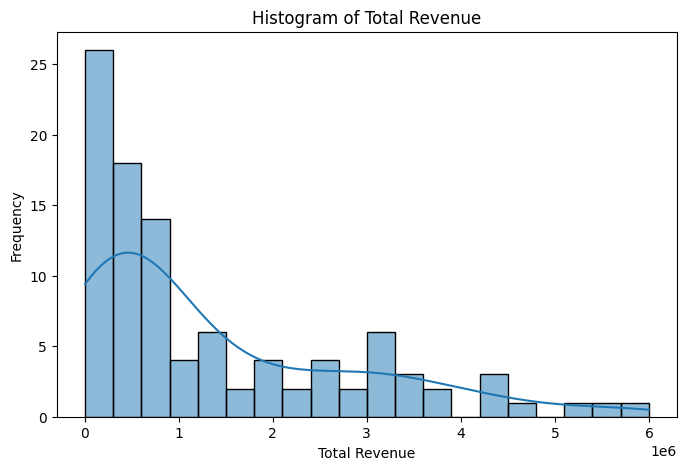

In [ ]:
# Histogram for Total Revenue
plt.figure(figsize=(8, 5))
sns.histplot(df['Total Revenue'], bins=20, kde=True)
plt.title('Histogram of Total Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('Frequency')
plt.show()


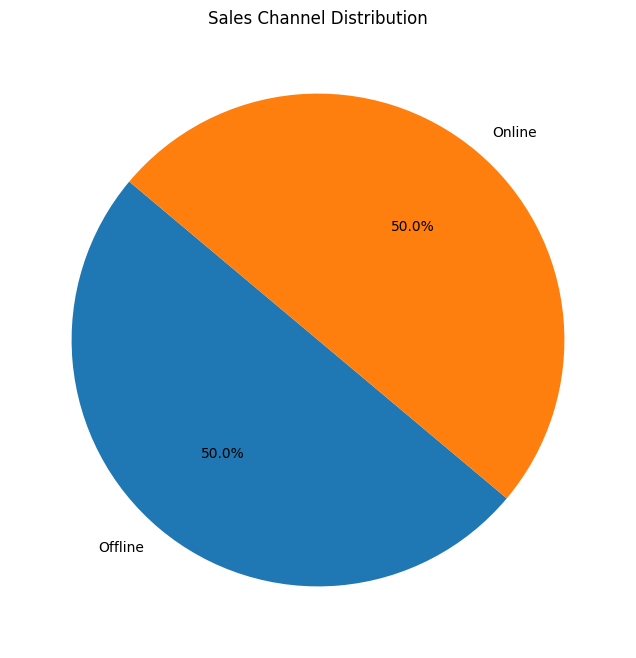

In [ ]:
# Pie chart for Sales Channel distribution
sales_channel_distribution = df['Sales Channel'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(sales_channel_distribution, labels=sales_channel_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Sales Channel Distribution')
plt.show()


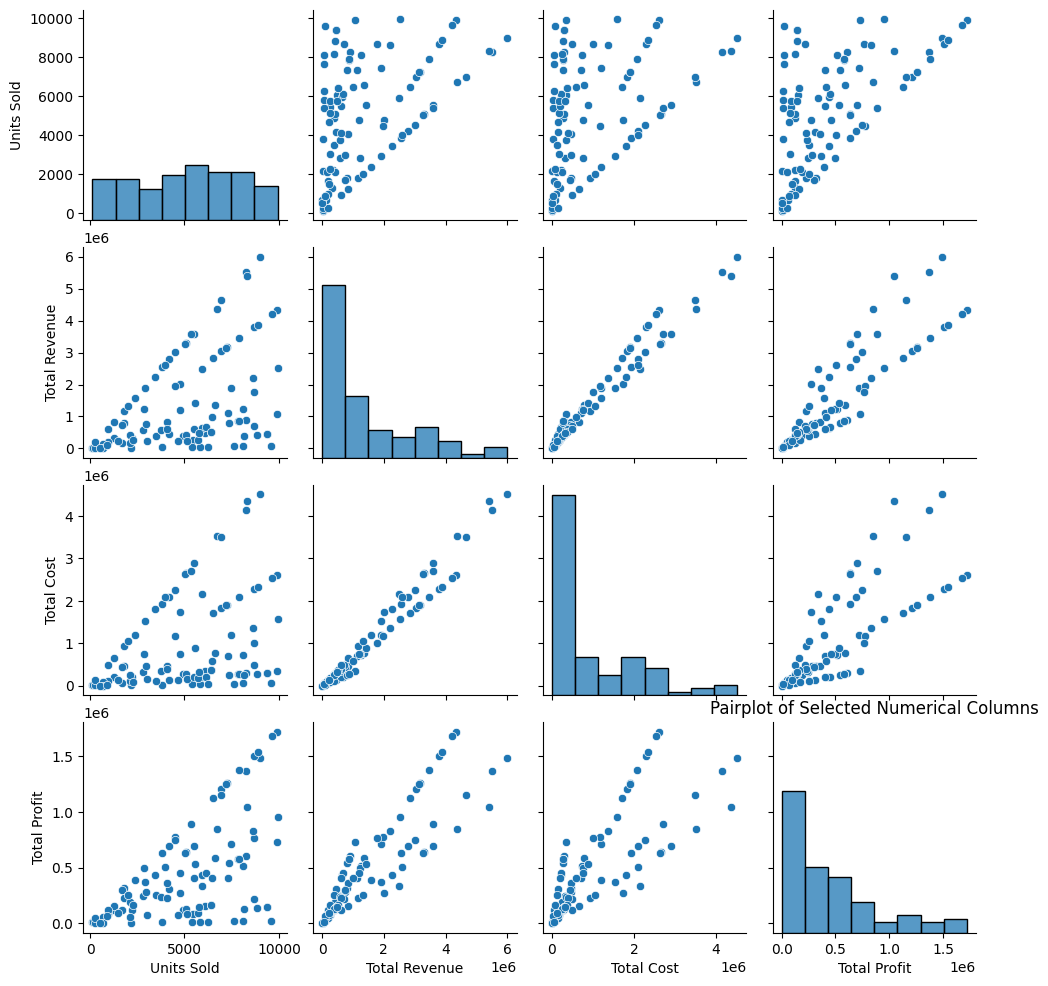

In [ ]:
# Pairplot for selected numerical columns
selected_columns = ['Units Sold', 'Total Revenue', 'Total Cost', 'Total Profit']
sns.pairplot(df[selected_columns])
plt.title('Pairplot of Selected Numerical Columns')
plt.show()
